In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import folium
import pandas as pd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214637 entries, 0 to 214636
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              214637 non-null  int64  
 1   name                            214637 non-null  object 
 2   host_id                         214637 non-null  int64  
 3   host_name                       214605 non-null  object 
 4   neighbourhood_group             214637 non-null  object 
 5   neighbourhood                   214637 non-null  object 
 6   latitude                        214637 non-null  float64
 7   longitude                       214637 non-null  float64
 8   room_type                       214637 non-null  object 
 9   price                           177265 non-null  float64
 10  minimum_nights                  214637 non-null  int64  
 11  number_of_reviews               214637 non-null  int64  
 12  last_review     

C:\Users\alber\AppData\Local\Temp\ipykernel_8404\2902659118.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['price'].fillna(data['price'].median(), inplace=True)
C:\Users\alber\AppData\Local\Temp\ipykernel_8404\2902659118.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

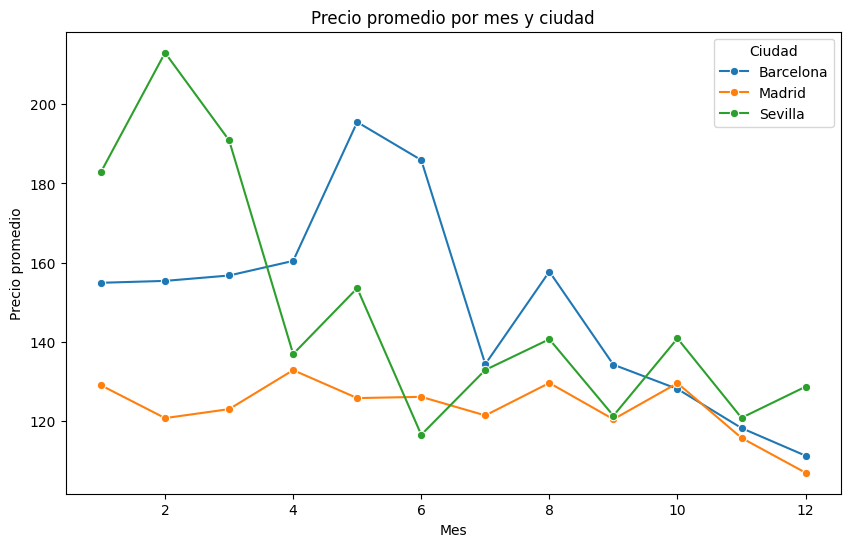

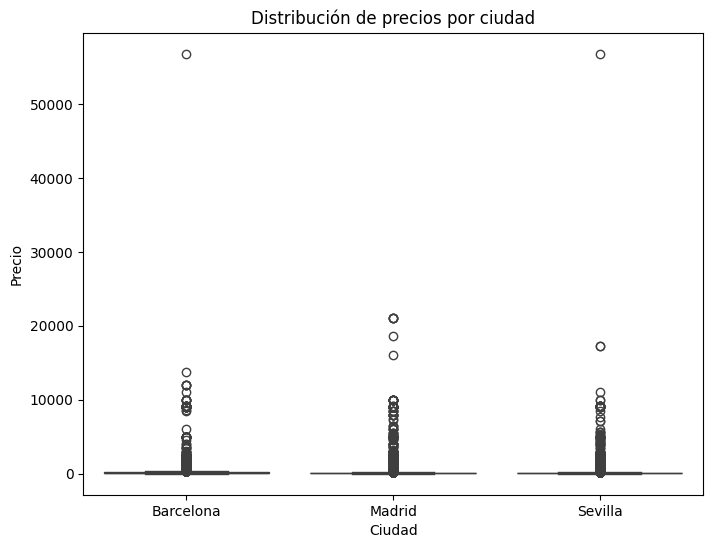

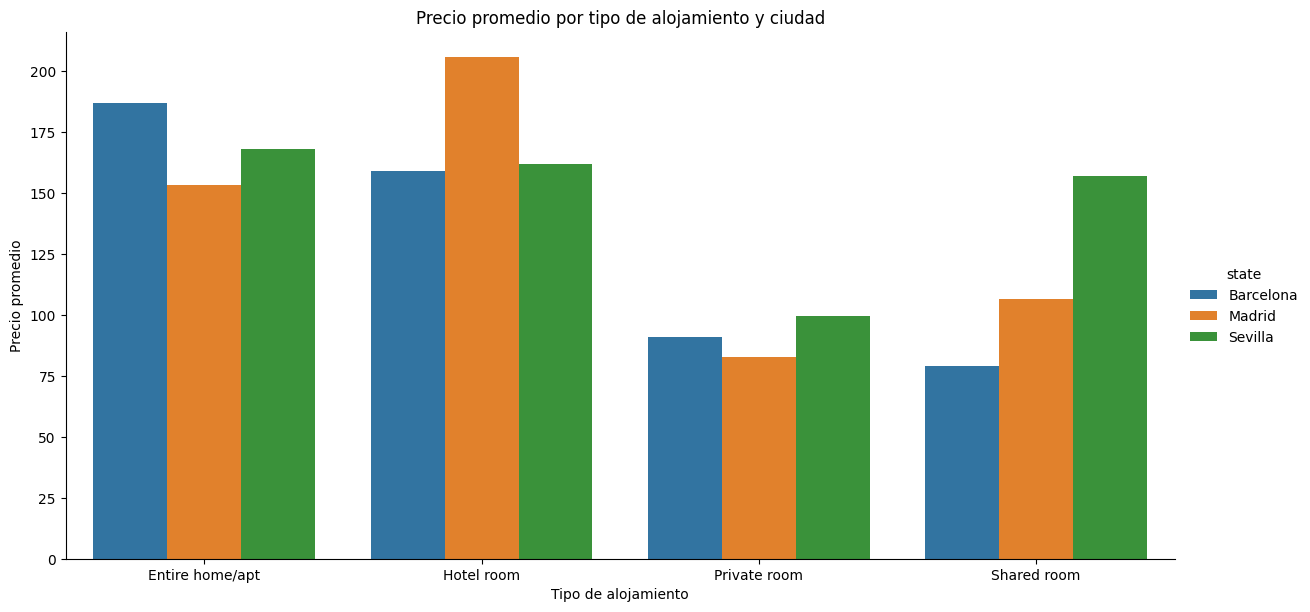

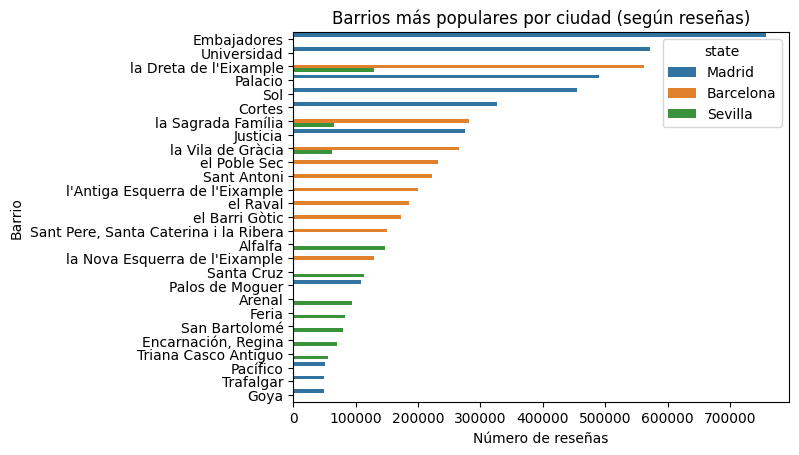

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214637 entries, 0 to 214636
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              214637 non-null  int64  
 1   name                            214637 non-null  object 
 2   host_id                         214637 non-null  int64  
 3   host_name                       214605 non-null  object 
 4   neighbourhood_group             214637 non-null  object 
 5   neighbourhood                   214637 non-null  object 
 6   latitude                        214637 non-null  float64
 7   longitude                       214637 non-null  float64
 8   room_type                       214637 non-null  object 
 9   price                           214637 non-null  float64
 10  minimum_nights                  214637 non-null  int64  
 11  number_of_reviews               214637 non-null  int64  
 12  last_review     

C:\Users\alber\AppData\Local\Temp\ipykernel_8404\2902659118.py:97: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['price'].fillna(data['price'].median(), inplace=True)
C:\Users\alber\AppData\Local\Temp\ipykernel_8404\2902659118.py:98: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

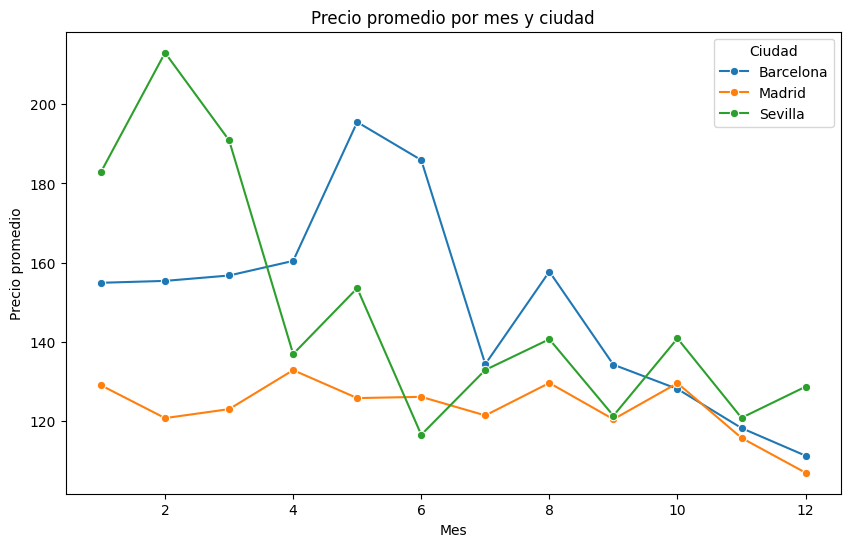

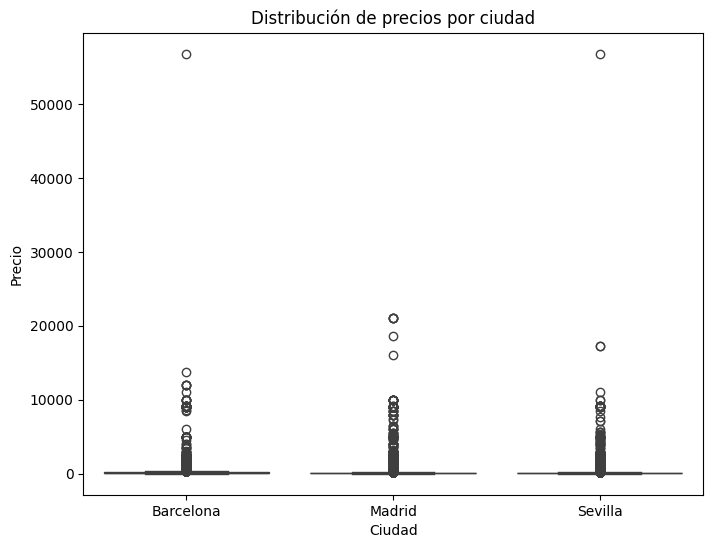

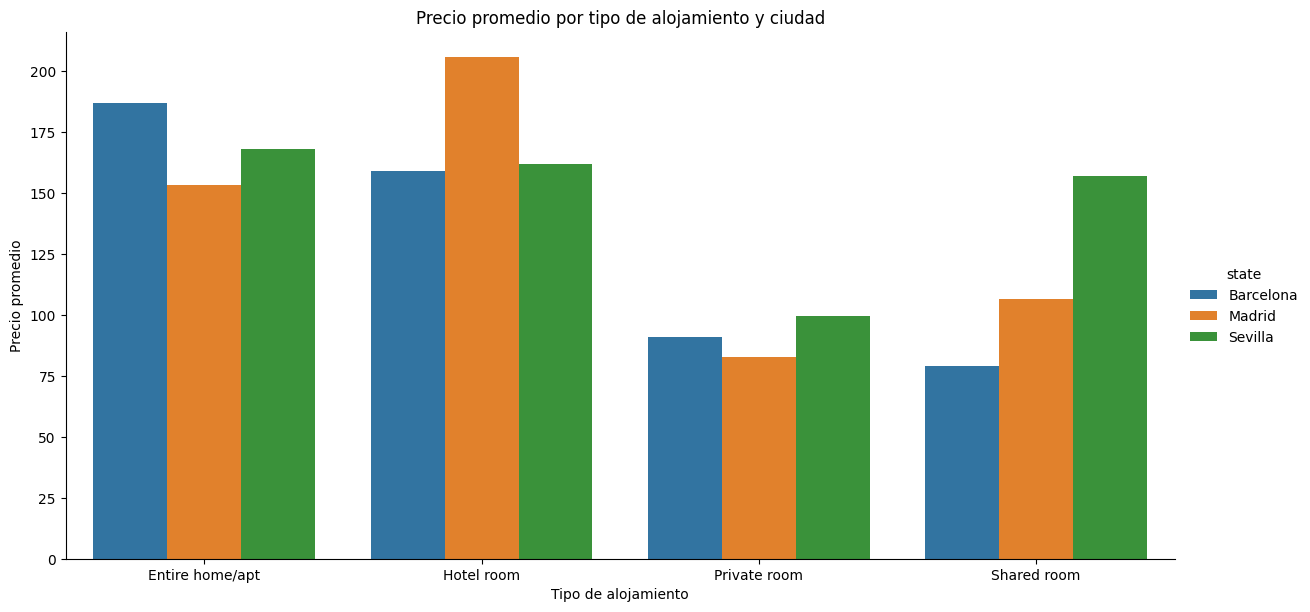

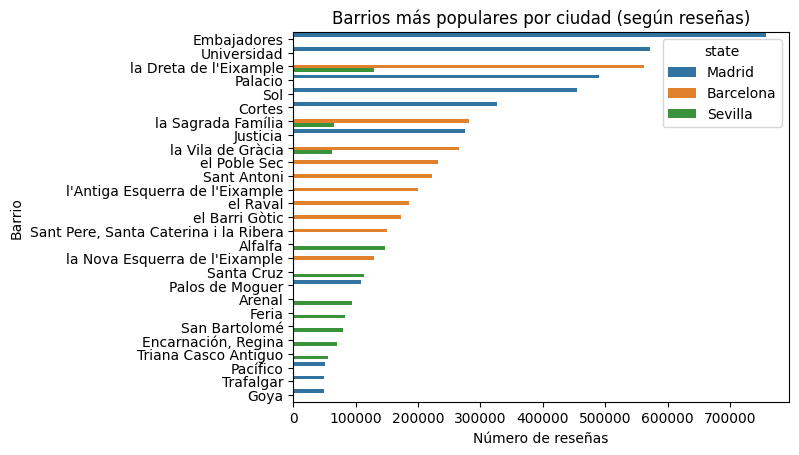

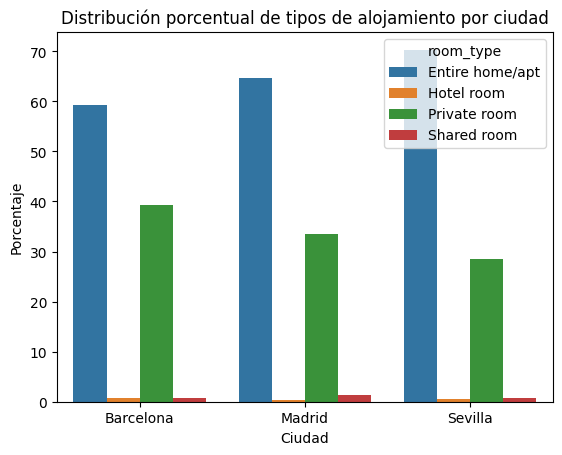

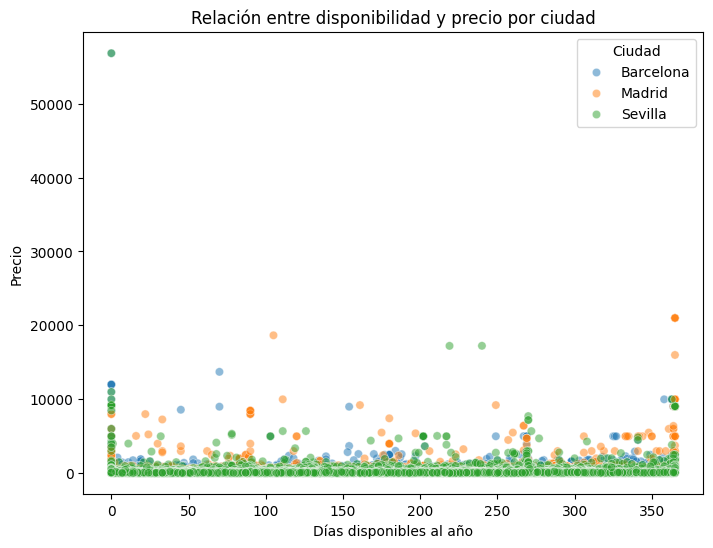

Top 10 Hosts más activos:
          host_id  total_listings   avg_price
19931  346367515            2938  152.555820
20148  357946540            1623   51.965496
20443  377605855            1192  204.449664
18760  291253690            1154  173.522530
6846    32037490            1086  207.194291
509      1447144             957  430.632184
1768     4459553             929  251.417653
24678  518713670             893   69.647256
21663  434208714             777  130.301158
21758  438136382             763  132.186107


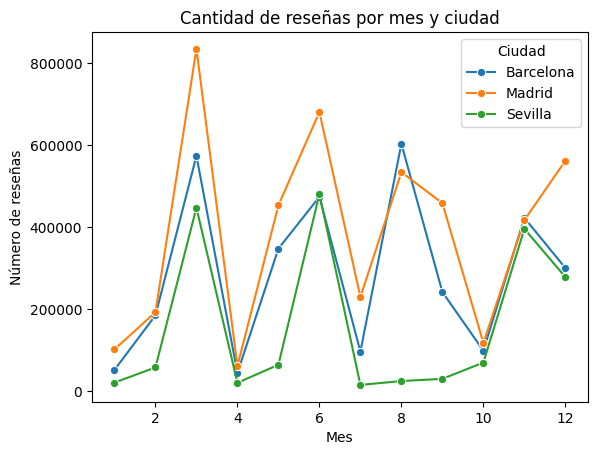

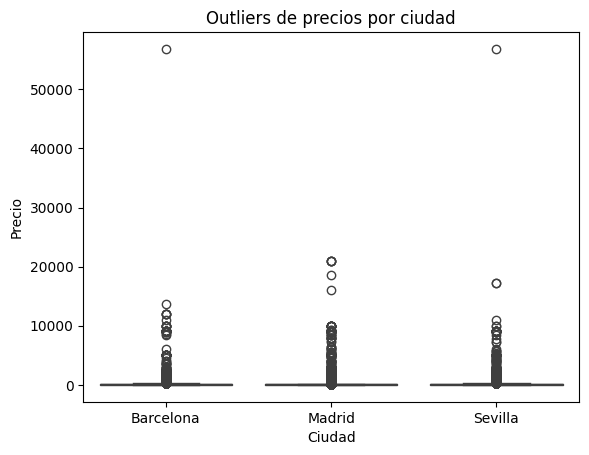

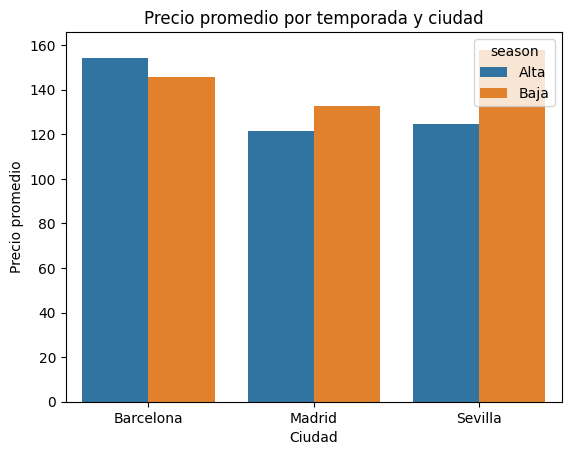

In [3]:
# Cargar los datos
file_path = r'C:\Users\alber\OneDrive\Documentos\GitHub\DS_ONLINE_THEBRIDGE_ATC\Project_Break_EDA\DataSetConjunto'
data = pd.read_csv(file_path)

# =============================
# 1. Exploración inicial
# =============================
# Verificar las primeras filas
data.head()

# Resumen de columnas y tipos de datos
data.info()

# Descripción estadística general
data.describe()

# =============================
# 2. Limpieza de datos
# =============================
# Identificar valores nulos
missing_values = data.isnull().sum()
print("Valores nulos por columna:\n", missing_values)

# Rellenar valores nulos en columnas importantes
# Suponiendo que los nulos en "price" o "reviews_per_month" necesitan ser tratados
data['price'].fillna(data['price'].median(), inplace=True)
data['reviews_per_month'].fillna(0, inplace=True)

# Eliminar columnas innecesarias (si aplica)
data.drop(columns=['license'], inplace=True, errors='ignore')

# Crear columnas adicionales útiles:
data['month'] = pd.to_datetime(data['last_review'], errors='coerce').dt.month

# =============================
# 3. Análisis exploratorio por hipótesis
# =============================

# 3a. Estacionalidad de precios
# Promedio de precios por mes y ciudad
price_by_month = data.groupby(['state', 'month'])['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=price_by_month, x='month', y='price', hue='state', marker='o')
plt.title('Precio promedio por mes y ciudad')
plt.xlabel('Mes')
plt.ylabel('Precio promedio')
plt.legend(title='Ciudad')
plt.show()

# 3b. Comparación de precios entre ciudades
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='state', y='price')
plt.title('Distribución de precios por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio')
plt.show()

# 3c. Tipo de alojamiento
room_type_stats = data.groupby(['state', 'room_type'])['price'].mean().reset_index()
sns.catplot(data=room_type_stats, x='room_type', y='price', hue='state', kind='bar', height=6, aspect=2)
plt.title('Precio promedio por tipo de alojamiento y ciudad')
plt.xlabel('Tipo de alojamiento')
plt.ylabel('Precio promedio')
plt.show()

# 3d. Popularidad de barrios
popular_neighbourhoods = data.groupby(['state', 'neighbourhood'])['number_of_reviews'].sum().reset_index()
popular_neighbourhoods = popular_neighbourhoods.sort_values(by='number_of_reviews', ascending=False).groupby('state').head(10)
sns.barplot(data=popular_neighbourhoods, y='neighbourhood', x='number_of_reviews', hue='state')
plt.title('Barrios más populares por ciudad (según reseñas)')
plt.xlabel('Número de reseñas')
plt.ylabel('Barrio')
plt.show()


# SEGUNDA PARTE 
# =============================
# 1. Exploración inicial
# =============================
# Verificar las primeras filas
data.head()

# Resumen de columnas y tipos de datos
data.info()

# Descripción estadística general
data.describe()

# =============================
# 2. Limpieza de datos
# =============================
# Identificar valores nulos
missing_values = data.isnull().sum()
print("Valores nulos por columna:\n", missing_values)

# Rellenar valores nulos en columnas importantes
data['price'].fillna(data['price'].median(), inplace=True)
data['reviews_per_month'].fillna(0, inplace=True)

# Eliminar columnas innecesarias (si aplica)
data.drop(columns=['license'], inplace=True, errors='ignore')

# Crear columnas adicionales útiles:
data['month'] = pd.to_datetime(data['last_review'], errors='coerce').dt.month

# =============================
# 3. Análisis exploratorio por hipótesis
# =============================

# 3a. Estacionalidad de precios
# Promedio de precios por mes y ciudad
price_by_month = data.groupby(['state', 'month'])['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=price_by_month, x='month', y='price', hue='state', marker='o')
plt.title('Precio promedio por mes y ciudad')
plt.xlabel('Mes')
plt.ylabel('Precio promedio')
plt.legend(title='Ciudad')
plt.show()

# 3b. Comparación de precios entre ciudades
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='state', y='price')
plt.title('Distribución de precios por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio')
plt.show()

# 3c. Tipo de alojamiento
room_type_stats = data.groupby(['state', 'room_type'])['price'].mean().reset_index()
sns.catplot(data=room_type_stats, x='room_type', y='price', hue='state', kind='bar', height=6, aspect=2)
plt.title('Precio promedio por tipo de alojamiento y ciudad')
plt.xlabel('Tipo de alojamiento')
plt.ylabel('Precio promedio')
plt.show()

# 3d. Popularidad de barrios
popular_neighbourhoods = data.groupby(['state', 'neighbourhood'])['number_of_reviews'].sum().reset_index()
popular_neighbourhoods = popular_neighbourhoods.sort_values(by='number_of_reviews', ascending=False).groupby('state').head(10)
sns.barplot(data=popular_neighbourhoods, y='neighbourhood', x='number_of_reviews', hue='state')
plt.title('Barrios más populares por ciudad (según reseñas)')
plt.xlabel('Número de reseñas')
plt.ylabel('Barrio')
plt.show()

# =============================
# 4. Profundización en el análisis
# =============================

# 4a. Distribución porcentual de tipos de alojamiento
room_type_distribution = data.groupby(['state', 'room_type']).size().reset_index(name='count')
room_type_distribution['percentage'] = room_type_distribution.groupby('state')['count'].transform(lambda x: x / x.sum() * 100)
sns.barplot(data=room_type_distribution, x='state', y='percentage', hue='room_type')
plt.title('Distribución porcentual de tipos de alojamiento por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Porcentaje')
plt.show()

# 4b. Relación entre disponibilidad y precio
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='availability_365', y='price', hue='state', alpha=0.5)
plt.title('Relación entre disponibilidad y precio por ciudad')
plt.xlabel('Días disponibles al año')
plt.ylabel('Precio')
plt.legend(title='Ciudad')
plt.show()

# 4c. Hosts más activos
top_hosts = data.groupby('host_id').agg(total_listings=('id', 'count'), avg_price=('price', 'mean')).reset_index()
top_hosts = top_hosts.sort_values(by='total_listings', ascending=False).head(10)
print("Top 10 Hosts más activos:\n", top_hosts)

# 4d. Reseñas por mes
reviews_by_month = data.groupby(['state', 'month'])['number_of_reviews'].sum().reset_index()
sns.lineplot(data=reviews_by_month, x='month', y='number_of_reviews', hue='state', marker='o')
plt.title('Cantidad de reseñas por mes y ciudad')
plt.xlabel('Mes')
plt.ylabel('Número de reseñas')
plt.legend(title='Ciudad')
plt.show()

# 4e. Geolocalización de alojamientos
barcelona_data = data[data['state'] == 'Barcelona']
map_barcelona = folium.Map(location=[barcelona_data['latitude'].mean(), barcelona_data['longitude'].mean()], zoom_start=12)
for _, row in barcelona_data.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=3,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5
    ).add_to(map_barcelona)
map_barcelona.save('map_barcelona.html')

# 4f. Outliers en precios
sns.boxplot(data=data, x='state', y='price')
plt.title('Outliers de precios por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio')
plt.show()

# 4g. Comparación por temporadas
high_season_months = [6, 7, 8, 12]
data['season'] = data['month'].apply(lambda x: 'Alta' if x in high_season_months else 'Baja')
season_prices = data.groupby(['state', 'season'])['price'].mean().reset_index()
sns.barplot(data=season_prices, x='state', y='price', hue='season')
plt.title('Precio promedio por temporada y ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio promedio')
plt.show()

#Diferenciación por ciudades

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu

# Crear columna de temporada
high_season_months = [6, 7, 8, 12]

def season_label(month):
    return 'Alta' if month in high_season_months else 'Baja'

data['season'] = data['month'].apply(season_label)

# =============================
# Función de análisis por ciudad
# =============================
def analyze_city(city_name):
    print(f"\n\n=== Análisis para {city_name} ===\n")
    
    # Filtrar datos de la ciudad
    city_data = data[data['state'] == city_name]
    
    # =============================
    # 1. Distribución de precios por temporada
    # =============================
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=city_data, x='season', y='price', palette='coolwarm')
    plt.title(f'Distribución de precios por temporada en {city_name}')
    plt.xlabel('Temporada')
    plt.ylabel('Precio')
    plt.show()
    
    # Prueba estadística: t-test
    high_season_prices = city_data[city_data['season'] == 'Alta']['price']
    low_season_prices = city_data[city_data['season'] == 'Baja']['price']
    
    # T-test
    t_stat, p_value = ttest_ind(high_season_prices, low_season_prices, nan_policy='omit')
    print(f"T-test ({city_name}): t-stat = {t_stat:.2f}, p-value = {p_value:.5f}")
    
    # Mann-Whitney U
    u_stat, p_value_u = mannwhitneyu(high_season_prices, low_season_prices, alternative='two-sided')
    print(f"Mann-Whitney U ({city_name}): U-stat = {u_stat:.2f}, p-value = {p_value_u:.5f}")
    
    # =============================
    # 2. Comparación por tipo de alojamiento
    # =============================
    room_season_prices = city_data.groupby(['season', 'room_type'])['price'].mean().reset_index()
    
    sns.catplot(data=room_season_prices, x='room_type', y='price', hue='season', kind='bar', height=6, aspect=2, palette='Set2')
    plt.title(f'Precio promedio por tipo de alojamiento y temporada en {city_name}')
    plt.xlabel('Tipo de alojamiento')
    plt.ylabel('Precio promedio')
    plt.show()
    
    # =============================
    # 3. Evolución mensual dentro de cada temporada
    # =============================
    monthly_prices = city_data.groupby(['month', 'season'])['price'].mean().reset_index()
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_prices, x='month', y='price', hue='season', markers=True, dashes=False)
    plt.title(f'Evolución mensual de precios por temporada en {city_name}')
    plt.xlabel('Mes')
    plt.ylabel('Precio promedio')
    plt.legend(title='Temporada')
    plt.show()
    
    # =============================
    # 4. Outliers en precios por temporada
    # =============================
    sns.boxplot(data=city_data, x='season', y='price', palette='coolwarm')
    plt.title(f'Outliers de precios por temporada en {city_name}')
    plt.xlabel('Temporada')
    plt.ylabel('Precio')
    plt.show()
    
    # =============================
    # 5. Insights clave
    # =============================
    if p_value < 0.05:
        print(f"En {city_name}, los precios en temporadas altas son significativamente diferentes de los precios en temporadas bajas (T-test).")
    else:
        print(f"En {city_name}, no se encontraron diferencias significativas en los precios entre temporadas altas y bajas (T-test).")
    
    if p_value_u < 0.05:
        print(f"La prueba no paramétrica confirma diferencias significativas en los precios en {city_name} (Mann-Whitney U).")
    else:
        print(f"La prueba no paramétrica no confirma diferencias significativas en los precios en {city_name} (Mann-Whitney U).")

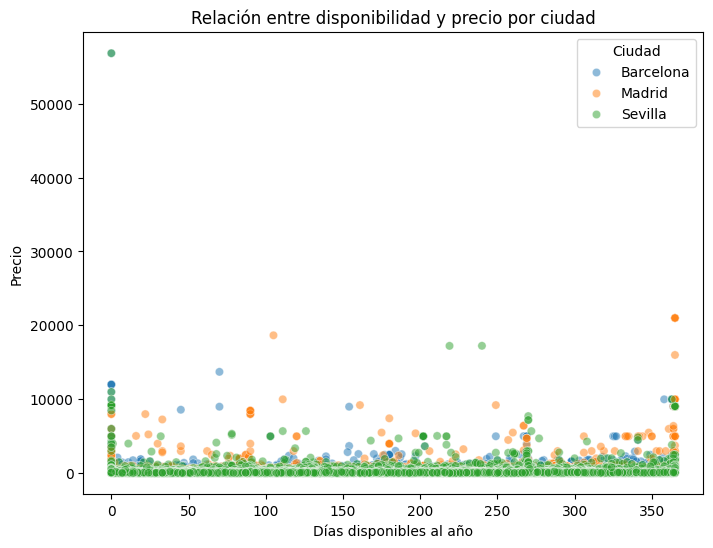

In [10]:
# 4b. Relación entre disponibilidad y precio
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='availability_365', y='price', hue='state', alpha=0.5)
plt.title('Relación entre disponibilidad y precio por ciudad')
plt.xlabel('Días disponibles al año')
plt.ylabel('Precio')
plt.legend(title='Ciudad')
plt.show()